# Experiment 1

### Description of the experiment...

We are going to reply the experiment

Talk about How the paper "Application of Deep Reinforcement Learning on Automated Stock Trading" writed by Lin Chen and Qiang Gao in 2019 apply DQN to trading S&P 500 ETF stocks Daily rate 

Data from 01/01/2000 to 12/31/2018

Training period:
(01/01/2000-12/31/2004)

Testing period:
(01/01/2005-12/31/2018)

Reward:
the reward is calculated by the difference between next day’s adjusted close and the current day’s adjusted close

(Im gonna add cach and stocks_hold and total price of portfolio just to have a evaluation metric)

Basicly what this model do is try to predict if the prediction of NN is write at buy or sell

NN Architect:

- Input: 22 Nodes (Features)
- Hidden Layer 1: 10 Nodes (ReLU)
- Hidden Layer 2: 10 Nodes (ReLU)
- Output: 3 Nodes (Actions)

Input:
- **Last 20 prices of stocks**: 20 Nodes with the price of the last 20 prices
- **Cash**: Actual Cash to buy a stock
- **Shares_held**: Number of S&P 500 ETF shares currently owned by the agent. 

Output:
- **Hold:** Do nothing, maintain current position.
- **Buy:** Buy 1 stock.
- **Sell:** Sell 1 stock.

### Get S&P 500 ETF Stocks Data

In [65]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
#Read DataFrame
SPY_stocks = pd.read_csv("../data/Preprocessed/SPY_Data.csv")
SPY_stocks = SPY_stocks.drop(['Unnamed: 0', 'High', 'Low'], axis=1)
SPY_stocks.head()

,Date,Close
0,1999-07-26,84.923210
1,1999-07-27,85.632195
2,1999-07-28,85.907906
3,1999-07-29,84.706596
4,1999-07-30,83.662720


### Generate Input Parameters of NN

In [3]:
inputs_SPY = SPY_stocks.copy()

window_size = 20 

for i in range(1, window_size):
    inputs_SPY[f'Close_t-{i}'] = inputs_SPY['Close'].shift(i)

In [8]:
inputs_SPY.head(5)

,Date,Close,Close_t-1,Close_t-2,Close_t-3,Close_t-4,Close_t-5,Close_t-6,Close_t-7,Close_t-8,...,Close_t-10,Close_t-11,Close_t-12,Close_t-13,Close_t-14,Close_t-15,Close_t-16,Close_t-17,Close_t-18,Close_t-19
0,1999-07-26,84.923210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1999-07-27,85.632195,84.923210,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,1999-07-28,85.907906,85.632195,84.923210,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1999-07-29,84.706596,85.907906,85.632195,84.923210,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,1999-07-30,83.662720,84.706596,85.907906,85.632195,84.92321,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
inputs_SPY.shape

(6534, 21)

In [5]:
inputs_SPY.columns

Index(['Date', 'Close', 'Close_t-1', 'Close_t-2', 'Close_t-3', 'Close_t-4',
       'Close_t-5', 'Close_t-6', 'Close_t-7', 'Close_t-8', 'Close_t-9',
       'Close_t-10', 'Close_t-11', 'Close_t-12', 'Close_t-13', 'Close_t-14',
       'Close_t-15', 'Close_t-16', 'Close_t-17', 'Close_t-18', 'Close_t-19'],
      dtype='object')

### Get years 2000-2004 to training and 2005-2018 to Testing

In [90]:
training_SPY = inputs_SPY.copy()

training_SPY = training_SPY[training_SPY['Date'] >= '2000-01-01']
training_SPY = training_SPY[training_SPY['Date'] <= '2005-01-01']
training_SPY.head()

,Date,Close,Close_t-1,Close_t-2,Close_t-3,Close_t-4,Close_t-5,Close_t-6,Close_t-7,Close_t-8,...,Close_t-10,Close_t-11,Close_t-12,Close_t-13,Close_t-14,Close_t-15,Close_t-16,Close_t-17,Close_t-18,Close_t-19
112,2000-01-03,92.142548,93.053238,92.904747,93.013657,92.617676,92.677139,92.805771,91.350555,91.113052,...,90.400291,89.823433,89.428421,88.954414,89.823433,89.665375,89.369156,88.934631,89.507401,90.238129
113,2000-01-04,88.539215,92.142548,93.053238,92.904747,93.013657,92.617676,92.677139,92.805771,91.350555,...,89.746895,90.400291,89.823433,89.428421,88.954414,89.823433,89.665375,89.369156,88.934631,89.507401
114,2000-01-05,88.697601,88.539215,92.142548,93.053238,92.904747,93.013657,92.617676,92.677139,92.805771,...,91.113052,89.746895,90.400291,89.823433,89.428421,88.954414,89.823433,89.665375,89.369156,88.934631
115,2000-01-06,87.272079,88.697601,88.539215,92.142548,93.053238,92.904747,93.013657,92.617676,92.677139,...,91.350555,91.113052,89.746895,90.400291,89.823433,89.428421,88.954414,89.823433,89.665375,89.369156
116,2000-01-07,92.340523,87.272079,88.697601,88.539215,92.142548,93.053238,92.904747,93.013657,92.617676,...,92.805771,91.350555,91.113052,89.746895,90.400291,89.823433,89.428421,88.954414,89.823433,89.665375


In [7]:
print("Oldst Date: ", training_SPY['Date'].min())
print("Recent Date: ", training_SPY['Date'].max())

Oldst Date:  2000-01-03
Recent Date:  2004-12-31


### Visualize Training Environment

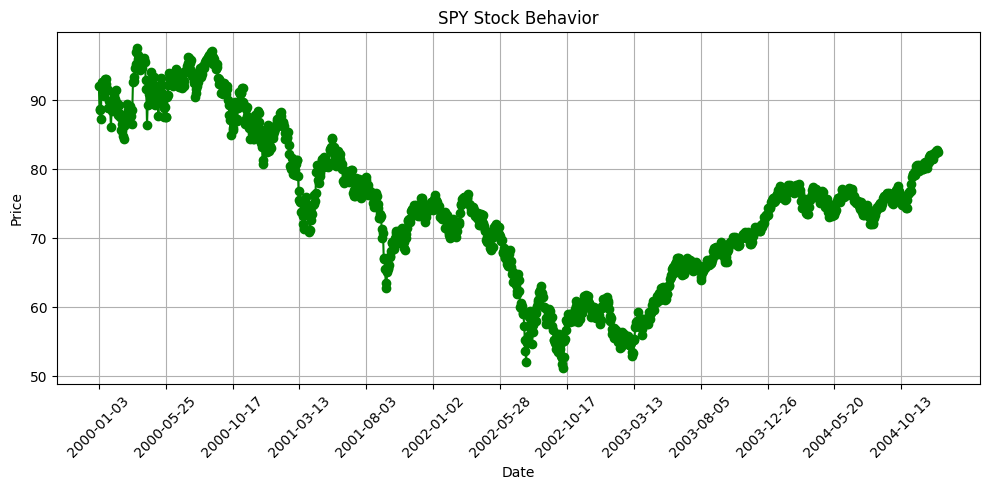

In [91]:
plt.figure(figsize=(10, 5))
plt.plot(training_SPY['Date'], training_SPY['Close'], marker='o', linestyle='-', color='green')
plt.title('SPY Stock Behavior')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

skip = 100
plt.xticks(training_SPY['Date'][::skip], rotation=45)

plt.tight_layout()
plt.show()

In [8]:
testing_SPY = inputs_SPY.copy()

testing_SPY = testing_SPY[testing_SPY['Date'] >= '2005-01-01']
testing_SPY = testing_SPY[testing_SPY['Date'] <= '2019-01-01']
testing_SPY.head()

,Date,Close,Close_t-1,Close_t-2,Close_t-3,Close_t-4,Close_t-5,Close_t-6,Close_t-7,Close_t-8,...,Close_t-10,Close_t-11,Close_t-12,Close_t-13,Close_t-14,Close_t-15,Close_t-16,Close_t-17,Close_t-18,Close_t-19
1368,2005-01-03,82.073990,82.462929,82.640297,82.797234,82.674400,82.224159,82.394691,82.333298,82.135445,...,81.487335,82.034492,82.081993,82.020889,81.735710,81.029503,80.948029,80.662827,80.194290,80.948029
1369,2005-01-04,81.071144,82.073990,82.462929,82.640297,82.797234,82.674400,82.224159,82.394691,82.333298,...,81.507767,81.487335,82.034492,82.081993,82.020889,81.735710,81.029503,80.948029,80.662827,80.194290
1370,2005-01-05,80.511719,81.071144,82.073990,82.462929,82.640297,82.797234,82.674400,82.224159,82.394691,...,82.135445,81.507767,81.487335,82.034492,82.081993,82.020889,81.735710,81.029503,80.948029,80.662827
1371,2005-01-06,80.921066,80.511719,81.071144,82.073990,82.462929,82.640297,82.797234,82.674400,82.224159,...,82.333298,82.135445,81.507767,81.487335,82.034492,82.081993,82.020889,81.735710,81.029503,80.948029
1372,2005-01-07,80.805069,80.921066,80.511719,81.071144,82.073990,82.462929,82.640297,82.797234,82.674400,...,82.394691,82.333298,82.135445,81.507767,81.487335,82.034492,82.081993,82.020889,81.735710,81.029503


In [9]:
print("Oldst Date: ", testing_SPY['Date'].min())
print("Recent Date: ", testing_SPY['Date'].max())

Oldst Date:  2005-01-03
Recent Date:  2018-12-31


### Creating the architecture of the Neural Network

In [27]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import random
from collections import deque

In [11]:
class DQN(nn.Module):
    def __init__(self, input_dim=12, output_dim=7):
        super(DQN, self).__init__()
        self.fc1 = nn.Linear(input_dim, 10)
        self.fc2 = nn.Linear(10, 10) #self.fc2 = nn.Linear(128, 128)
        self.fc3 = nn.Linear(10, output_dim)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        return self.fc3(x)

### Create Custom Trading Environment

In [72]:
class TradingEnv:
    
    """
    Initialize the trading environment.
    """
    def __init__(self, df, initial_cash=10_000):
        # Load and sort data
        self.df = df.reset_index(drop=True).copy()
        self.max_steps = len(self.df) - 2  # total steps (days)

        # Initial portfolio settings
        self.initial_cash = initial_cash
        self.cash = initial_cash
        self.shares_held = 0.0
        self.current_step = 0
        self.prev_portfolio_value = initial_cash

        # Track total reward and history
        self.total_reward = 0
        self.history = []

        # Action mapping
        self.action_mapping = {
            0: 'hold',
            1: 1,  # buy
            2: -1,  # sell
        }

        # Define input features
        self.feature_cols = [
            'Close', 'Close_t-1', 'Close_t-2', 'Close_t-3', 'Close_t-4',
            'Close_t-5', 'Close_t-6', 'Close_t-7', 'Close_t-8', 'Close_t-9',
            'Close_t-10', 'Close_t-11', 'Close_t-12', 'Close_t-13', 'Close_t-14',
            'Close_t-15', 'Close_t-16', 'Close_t-17', 'Close_t-18', 'Close_t-19'
            ]


    """
    Reset the environment to the initial state.
    """
    def reset(self):
        self.cash = self.initial_cash          # Reset available capital
        self.shares_held = 0.0                 # No shares at start
        self.current_step = 0                  # Start at the beginning of the dataset
        self.prev_portfolio_value = self.initial_cash  # Track portfolio for reward calc
        self.total_reward = 0.0                # Reset reward tracker
        self.history = []                      # Clear history
        
        return self._get_state()


    """
    Construct the current state vector.
    """
    def _get_state(self):
        row = self.df.loc[self.current_step]
    
        # Extract the market features
        features = []
        for col in self.feature_cols:
            features.append(row[col])
    
        # Append portfolio state
        features.append(self.cash)
        features.append(self.shares_held)
    
        return np.array(features, dtype=np.float32)

    """
    Execute one time step in the environment.
    """
    def step(self, action):
        done = False
        reward = 0.0
        invalid_action_penalty = -0.1

        current_price = self.df.loc[self.current_step, 'Close']
        action_type = self.action_mapping[action]

        # Apply action
        if action == 0:
            pass  # hold
        elif action == 1:  # buy
            if self.cash >= current_price:
                self._buy()
            else:
                reward += invalid_action_penalty  # penalize invalid buy
        elif action == -1:  # sell
            if self.shares_held > 0:
                self._sell()
            else:
                reward += invalid_action_penalty  # penalize invalid sell

        # Advance to next time step
        self.current_step += 1
        done = self.current_step >= self.max_steps - 1

        if done:
            final_value = self._get_portfolio_value()

            reward += self._calculate_reward(self.initial_cash, final_value)

            next_state = self._get_state()
            return next_state, reward, done, {}

        self.current_price = self.df.loc[self.current_step, 'Close']

        # Calculate new portfolio value
        portfolio_value = self._get_portfolio_value()

        #Make Reward 
        reward += (portfolio_value - self.prev_portfolio_value) / self.prev_portfolio_value
        
        self.prev_portfolio_value = portfolio_value
        self.total_reward += reward

        # Log history for debugging/analysis
        self.history.append({
            'step': self.current_step,
            'cash': self.cash,
            'shares_held': self.shares_held,
            'portfolio_value': portfolio_value,
            'action': action,
            'reward': reward
        })

        # Return next state
        next_state = self._get_state()
        return next_state, reward, done, {}

    """
    Execute order to buy 1 stock.
    """
    def _buy(self):
        current_price = self.df.loc[self.current_step, 'Close']

        self.cash -= current_price
        self.shares_held += 1

    
    """
    Execute order to sell 1 stock.
    """
    def _sell(self):
        current_price = self.df.loc[self.current_step, 'Close']

        self.cash += current_price
        self.shares_held -= 1

    """
    Calculate the current total portfolio value:
    cash + (shares_held × current market price)
    """
    def _get_portfolio_value(self):
        current_price = self.df.loc[self.current_step, 'Close']
        return self.cash + (self.shares_held * current_price)

    """
    Generate Final Reward
    """
    def _calculate_reward(self, initial_value, final_value):
        change_ratio = (final_value - initial_value) / initial_value
        
        if change_ratio > 0:
            reward = math.floor(change_ratio * 10) + 1  
            return max(1, reward) 
        elif change_ratio < 0:
            reward = math.ceil(abs(change_ratio) * 10) 
            return -max(1, reward) 
        else:
            return 0
    

        

### Initializing the hyperparameters

In [20]:
# Learning rate for optimizer (controls how fast the model learns)
learning_rate = 5e-4
# Number of experiences used for each learning step
minibatch_size = 100
# Discount factor (γ): how much future rewards are valued vs. immediate rewards
#discount_factor = 0.95
discount_factor = 0.99
# Size of the experience replay buffer
replay_buffer_size = int(1e5)
# Soft update rate (τ): how fast target network updates towards the main network
interpolation_parameter = 1e-3

### Implementing Experience Replay

In [21]:
class ReplayMemory(object):

    def __init__(self, capacity):
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.capacity = capacity
        self.memory = []

    def push(self, event):
        self.memory.append(event)
        if len(self.memory) > self.capacity:
            del self.memory[0]

    def sample(self, batch_size):
        experiences = random.sample(self.memory, k=batch_size)
    
        states = torch.from_numpy(
            np.vstack([e[0] for e in experiences if e is not None])
        ).float().to(self.device)
    
        actions = torch.from_numpy(
            np.vstack([e[1] for e in experiences if e is not None])
        ).long().to(self.device)
    
        rewards = torch.from_numpy(
            np.vstack([e[2] for e in experiences if e is not None])
        ).float().to(self.device)
    
        next_states = torch.from_numpy(
            np.vstack([e[3] for e in experiences if e is not None])
        ).float().to(self.device)
    
        dones = torch.from_numpy(
            np.vstack([e[4] for e in experiences if e is not None]).astype(np.uint8)
        ).float().to(self.device)
    
        return states, next_states, actions, rewards, dones

    def __len__(self):
        return len(self.memory)

### Create DQN Agent

In [22]:
class Agent:
    def __init__(self, state_size, action_size):
        self.device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
        self.state_size = state_size
        self.action_size = action_size
        self.local_qnetwork = DQN(state_size, action_size).to(self.device)
        self.target_qnetwork = DQN(state_size, action_size).to(self.device)
        self.optimizer = optim.Adam(self.local_qnetwork.parameters(), lr = learning_rate)
        self.memory = ReplayMemory(replay_buffer_size)
        self.t_step = 0

    def step(self, state, action, reward, next_state, done):
        self.memory.push((state, action, reward, next_state, done))
        self.t_step = (self.t_step + 1) % 4
        if self.t_step == 0:
          if len(self.memory.memory) > minibatch_size:
            experiences = self.memory.sample(100)
            self.learn(experiences, discount_factor)

    def act(self, state, epsilon = 0.):
        state = torch.from_numpy(state).float().unsqueeze(0).to(self.device)
        self.local_qnetwork.eval()
        with torch.no_grad():
          action_values = self.local_qnetwork(state)
        self.local_qnetwork.train()
        if random.random() > epsilon:
          return np.argmax(action_values.cpu().data.numpy())
        else:
          return random.choice(np.arange(self.action_size))

    def learn(self, experiences, discount_factor):
        states, next_states, actions, rewards, dones = experiences
        next_q_targets = self.target_qnetwork(next_states).detach().max(1)[0].unsqueeze(1)
        q_targets = rewards + discount_factor * next_q_targets * (1 - dones)
        q_expected = self.local_qnetwork(states).gather(1, actions)
        loss = F.mse_loss(q_expected, q_targets)
        self.optimizer.zero_grad()
        loss.backward()
        self.optimizer.step()
        self.soft_update(self.local_qnetwork, self.target_qnetwork, interpolation_parameter)

    def soft_update(self, local_model, target_model, interpolation_parameter):
        for target_param, local_param in zip(target_model.parameters(), local_model.parameters()):
          target_param.data.copy_(interpolation_parameter * local_param.data + (1.0 - interpolation_parameter) * target_param.data)

### Initializing the DQN agent and Envirionment

In [73]:
agent = Agent(22, 3)
env = TradingEnv(training_SPY)

In [74]:
number_episodes = 2000
maximum_number_timesteps_per_episode = 1000
epsilon_starting_value  = 1.0
epsilon_ending_value  = 0.01
#epsilon_ending_value  = 0.1 
epsilon_decay_value  = 0.995
#epsilon_decay_value  = 0.95
epsilon = epsilon_starting_value
scores_on_100_episodes = deque(maxlen = 100)
total_value_on_100_episodes = deque(maxlen = 100)

for episode in range(1, number_episodes + 1):
    state = env.reset()
    score = 0
    #for t in range(maximum_number_timesteps_per_episode):
    for t in range(env.max_steps):
        action = agent.act(state, epsilon)
        next_state, reward, done, _ = env.step(action)
        agent.step(state, action, reward, next_state, done)
        state = next_state
        score += reward
        if done:
          break
    scores_on_100_episodes.append(score)
    total_value_on_100_episodes.append(env.prev_portfolio_value)
    epsilon = max(epsilon_ending_value, epsilon_decay_value * epsilon)
    
    print('\rEpisode {}  Score: {:.2f} Initial Catch: {:.2f}  Total Catch {:.2f}, Total Holds:{}, Price stock: {:.2f}, Total Value: {:.2f}'.format(episode, score, env.initial_cash, env.cash, env.shares_held, env.current_price, env.prev_portfolio_value), end = "")
    
    if episode % 100 == 0:
        print('')
        print('\rEpisode {}  Average Score: {:.2f} Average Total Value: {:.2f}'.format(episode, np.mean(scores_on_100_episodes), np.mean(total_value_on_100_episodes)))

torch.save(agent.local_qnetwork.state_dict(), 'dqn_trading_Experiment_1.pth')

Episode 100  Score: -19.74 Initial Catch: 10000.00  Total Catch 3.79, Total Holds:120.0, Price stock: 82.67, Total Value: 9924.720
Episode 100  Average Score: -23.09 Average Total Value: 9699.75
Episode 200  Score: -0.59 Initial Catch: 10000.00  Total Catch 54.66, Total Holds:131.0, Price stock: 82.67, Total Value: 10885.000
Episode 200  Average Score: -5.91 Average Total Value: 10742.09
Episode 300  Score: 1.09 Initial Catch: 10000.00  Total Catch 2087.98, Total Holds:106.0, Price stock: 82.67, Total Value: 10851.47
Episode 300  Average Score: 1.06 Average Total Value: 10944.98
Episode 400  Score: 1.08 Initial Catch: 10000.00  Total Catch 4875.22, Total Holds:71.0, Price stock: 82.67, Total Value: 10745.104
Episode 400  Average Score: 1.10 Average Total Value: 10632.42
Episode 500  Score: 1.04 Initial Catch: 10000.00  Total Catch 6626.56, Total Holds:45.0, Price stock: 82.67, Total Value: 10346.90
Episode 500  Average Score: 1.07 Average Total Value: 10422.45
Episode 600  Score: 1.01 

# Testing model

In [75]:
test_env = TradingEnv(testing_SPY)

In [76]:
# Recreate the model architecture
trained_model = DQN(input_dim=22, output_dim=3)  # adjust if your input/output sizes changed

# Load the weights
trained_model.load_state_dict(torch.load('Models/dqn_trading_Experiment_1.pth'))
trained_model.eval()  # Set to evaluation mode

DQN(
  (fc1): Linear(in_features=22, out_features=10, bias=True)
  (fc2): Linear(in_features=10, out_features=10, bias=True)
  (fc3): Linear(in_features=10, out_features=3, bias=True)
)

In [77]:
state = test_env.reset()
done = False
total_reward = 0
actions = []
stocks_held = []
actual_cash = []
stock_price = []
portfolio_values = []

while not done:
    
    state_tensor = torch.from_numpy(state).float().unsqueeze(0)
    
    with torch.no_grad():
        action_values = trained_model(state_tensor)

    action = torch.argmax(action_values).item()
    next_state, reward, done, _ = test_env.step(action)

    total_reward += reward


    actions.append(action)
    stocks_held.append(test_env.shares_held)
    actual_cash.append(test_env.cash)
    stock_price.append(test_env.current_price)
    portfolio_values.append(test_env.prev_portfolio_value)
    
    state = next_state

print("Total Reward:", total_reward)
print("Final Portfolio Value:", test_env.prev_portfolio_value)

Total Reward: 1.0337684979251875
Final Portfolio Value: 10342.528312683105


### Visualize Result

In [78]:
def group_actions(valor):
    valor = valor.lower()
    if "buy" in valor:
        return "buy"
    elif "sell" in valor:
        return "sell"
    elif "hold" in valor:
        return "hold"

In [79]:
test_SPY_stocks = pd.read_csv("../data/Preprocessed/SPY_Data.csv")
test_SPY_stocks = test_SPY_stocks.drop(['Unnamed: 0'], axis=1)
test_SPY_stocks.head()

,Date,High,Low,Close
0,1999-07-26,85.789774,84.844432,84.923210
1,1999-07-27,86.469216,85.317081,85.632195
2,1999-07-28,86.538133,85.454929,85.907906
3,1999-07-29,85.238351,84.017284,84.706596
4,1999-07-30,85.297373,83.544552,83.662720


In [80]:
test_vis_SPY = test_SPY_stocks[test_SPY_stocks['Date'] >= '2005-01-01']
test_vis_SPY = test_vis_SPY[test_vis_SPY['Date'] <= '2019-01-01']
test_vis_SPY = test_vis_SPY.drop(test_vis_SPY.index[0])
test_vis_SPY = test_vis_SPY.drop(test_vis_SPY.tail(2).index)
test_vis_SPY = test_vis_SPY.drop(['High', 'Low'], axis=1)
test_vis_SPY['v_Close'] = stock_price
test_vis_SPY['Prev_Action'] = actions
test_vis_SPY['Stocks_Held'] = stocks_held
test_vis_SPY['Actual_Cash'] = actual_cash
test_vis_SPY['Portfolio_Values'] = portfolio_values

test_vis_SPY['Prev_Action'] = test_vis_SPY['Prev_Action'].map({
    0: "hold",
    1: "Buy",
    2: "Sell"
})

test_vis_SPY['Stocks_Money'] = test_vis_SPY['Close'] * test_vis_SPY['Stocks_Held']
test_vis_SPY['Color_Action'] = test_vis_SPY['Prev_Action'].apply(group_actions)

test_vis_SPY.head(10)

,Date,Close,v_Close,Prev_Action,Stocks_Held,Actual_Cash,Portfolio_Values,Stocks_Money,Color_Action
1369,2005-01-04,81.071144,81.071144,hold,0.0,10000.0,10000.0,0.0,hold
1370,2005-01-05,80.511719,80.511719,hold,0.0,10000.0,10000.0,0.0,hold
1371,2005-01-06,80.921066,80.921066,hold,0.0,10000.0,10000.0,0.0,hold
1372,2005-01-07,80.805069,80.805069,hold,0.0,10000.0,10000.0,0.0,hold
1373,2005-01-10,81.187134,81.187134,hold,0.0,10000.0,10000.0,0.0,hold
1374,2005-01-11,80.627693,80.627693,hold,0.0,10000.0,10000.0,0.0,hold
1375,2005-01-12,80.893738,80.893738,hold,0.0,10000.0,10000.0,0.0,hold
1376,2005-01-13,80.245613,80.245613,hold,0.0,10000.0,10000.0,0.0,hold
1377,2005-01-14,80.668640,80.668640,hold,0.0,10000.0,10000.0,0.0,hold
1378,2005-01-18,81.507767,81.507767,hold,0.0,10000.0,10000.0,0.0,hold


In [82]:
normal_final_invest = 10000 * (test_vis_SPY['Close'].iloc[-1] / test_vis_SPY['Close'].iloc[0])

print("Stock Prices First Day:", test_vis_SPY['Close'].iloc[0])
print("Stock Prices Last Day:", test_vis_SPY['Close'].iloc[-1])
print("Final Portfolio Value if you will invest $10,000 normal:", normal_final_invest)
print("Final Portfolio Value if invest $10,000 with Trading Bot:", test_env.prev_portfolio_value)

Stock Prices First Day: 81.0711441040039
Stock Prices Last Day: 224.37730407714844
Final Portfolio Value if you will invest $10,000 normal: 27676.592770086118
Final Portfolio Value if invest $10,000 with Trading Bot: 10342.528312683105


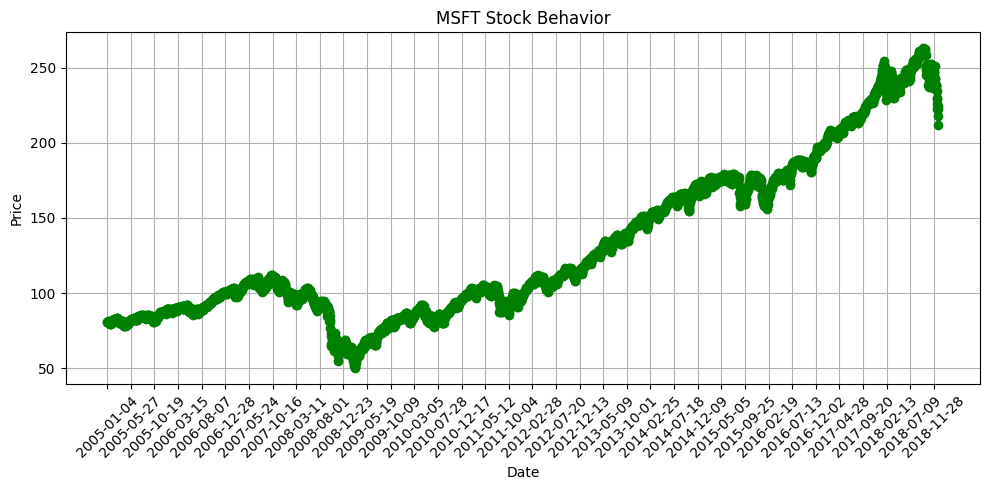

In [85]:
plt.figure(figsize=(10, 5))
plt.plot(test_vis_SPY['Date'], test_vis_SPY['Close'], marker='o', linestyle='-', color='green')
plt.title('MSFT Stock Behavior')
plt.xlabel('Date')
plt.ylabel('Price')
plt.grid(True)

skip = 100
plt.xticks(test_vis_SPY['Date'][::skip], rotation=45)

plt.tight_layout()
plt.show()

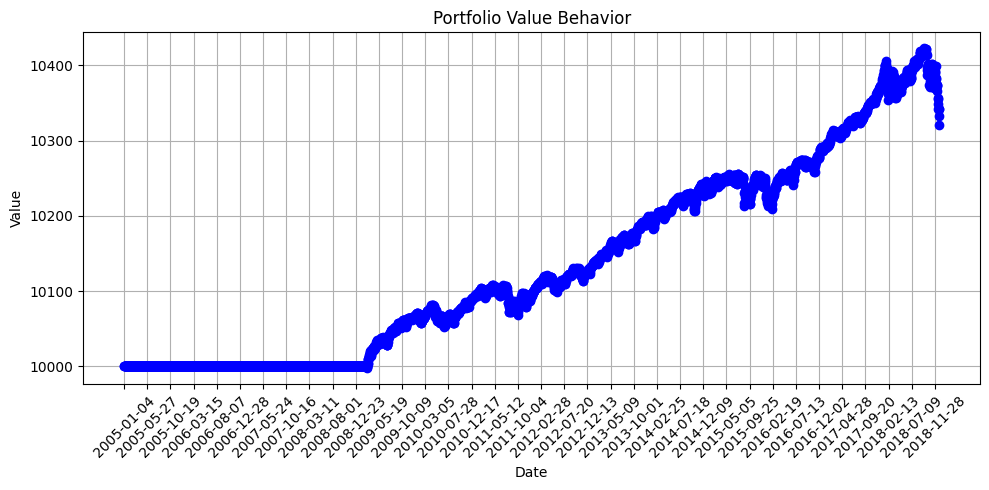

In [86]:
plt.figure(figsize=(10, 5))
plt.plot(test_vis_SPY['Date'], test_vis_SPY['Portfolio_Values'], marker='o', linestyle='-', color='blue')
plt.title('Portfolio Value Behavior')
plt.xlabel('Date')
plt.ylabel('Value')
plt.grid(True)

skip = 100
plt.xticks(test_vis_SPY['Date'][::skip], rotation=45)

plt.tight_layout()
plt.show()

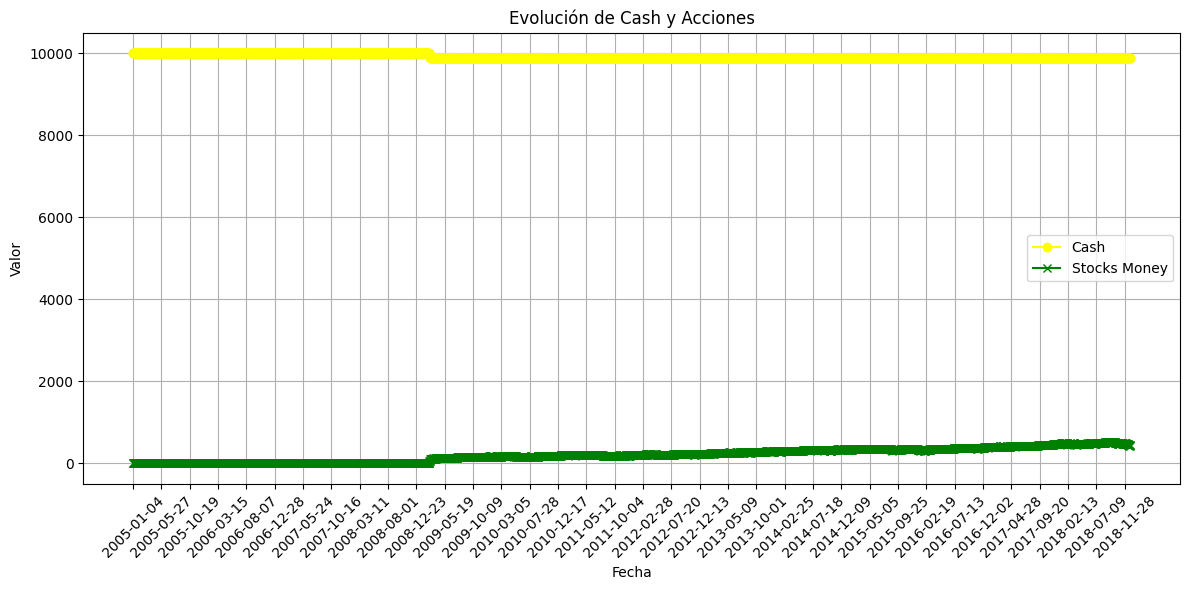

In [87]:
plt.figure(figsize=(12, 6))

plt.plot(test_vis_SPY['Date'], test_vis_SPY['Actual_Cash'], label='Cash', color='Yellow', marker='o')
plt.plot(test_vis_SPY['Date'], test_vis_SPY['Stocks_Money'], label='Stocks Money', color='Green', marker='x')

# Configuración general
plt.title('Evolución de Cash y Acciones')
plt.xlabel('Fecha')
plt.ylabel('Valor')
plt.legend()
plt.grid(True)

skip = 100
plt.xticks(test_vis_SPY['Date'][::skip], rotation=45)

plt.tight_layout()

# Mostrar
plt.show()

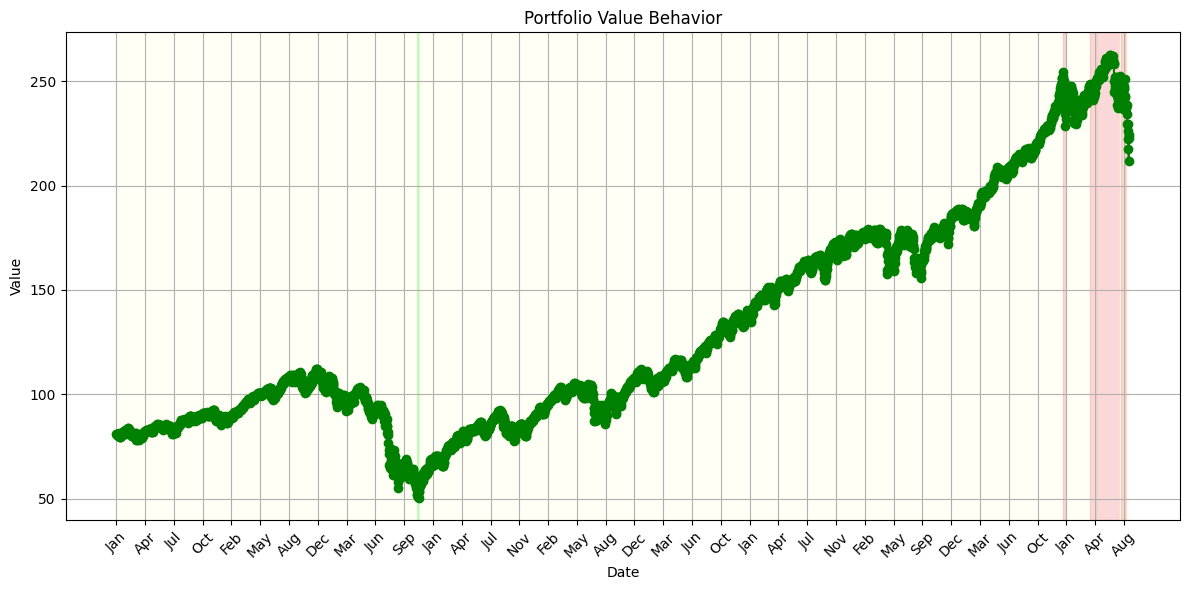

In [89]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

fig, ax = plt.subplots(figsize=(12, 6))

ax.plot(test_vis_SPY['Date'], test_vis_SPY['Close'], color='green', marker='o')

state_colors = {
    'buy': 'lightgreen',
    'sell': 'lightcoral',
    'hold': 'lightyellow'
}

prev_state = None
start_date = None

for i, row in test_vis_SPY.iterrows():
    current_state = row['Color_Action']
    current_date = row['Date']

    if current_state != prev_state:
        if prev_state is not None:
            ax.axvspan(start_date, current_date, color=state_colors[prev_state], alpha=0.3)
        start_date = current_date
        prev_state = current_state

ax.axvspan(start_date, test_vis_SPY['Date'].iloc[-1], color=state_colors[prev_state], alpha=0.3)

ax.xaxis.set_major_locator(mdates.MonthLocator())
ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

plt.title("Portfolio Value Behavior")
plt.xlabel("Date")
plt.ylabel("Value")
plt.grid(True)

skip = 100
plt.xticks(test_vis_SPY['Date'][::skip], rotation=45)

plt.tight_layout()
plt.show()